<a href="https://colab.research.google.com/github/bikash-bhoi/EIP4/blob/master/Session3/Assignment_6_e_reducelr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017)  
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D, Reshape
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


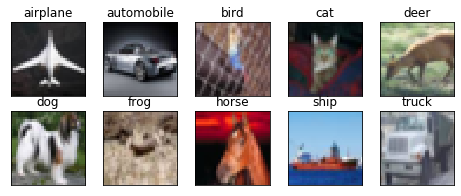

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 28s 72ms/step - loss: 1.8532 - acc: 0.2944 - val_loss: 1.3934 - val_acc: 0.4876
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 1.3516 - acc: 0.5055 - val_loss: 1.1443 - val_acc: 0.5915
Epoch 3/50
390/390 [==============================] - 20s 51ms/step - loss: 1.1397 - acc: 0.5945 - val_loss: 0.9708 - val_acc: 0.6540
Epoch 4/50
390/390 [==============================] - 20s 51ms/step - loss: 1.0011 - acc: 0.6476 - val_loss: 0.9342 - val_acc: 0.6734
Epoch 5/50
390/390 [==============================] - 20s 51ms/step - loss: 0.9127 - acc: 0.6816 - val_loss: 0.8205 - val_acc: 0.7158
Epoch 6/50
390/390 [==============================] - 20s 51ms/step - loss: 0.8445 - acc: 0.7080 - val_loss: 0.7799 - val_acc: 0.7375
Epoch 7/50
390/390 [==============================] - 20s 51ms/step - loss: 0.7744 - acc: 0.7336 - val_loss: 0.7478 - val_acc: 0.7445
Epoch 8/50
390/390 [==============================] - 

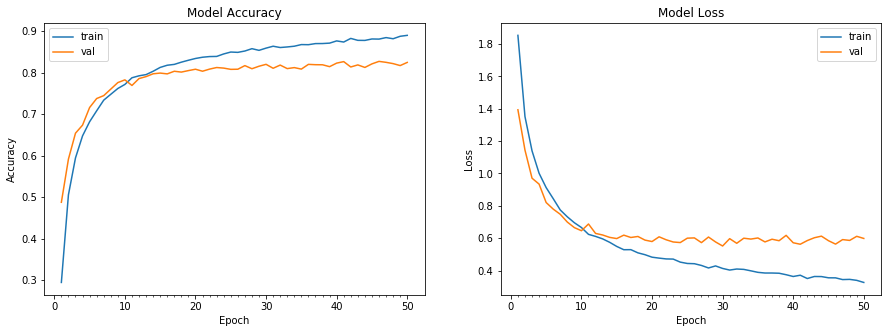

Accuracy on test data is: 82.45


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [7]:
# Define the New model beat Vacc 0.8270
model1 = Sequential()

model1.add(SeparableConv2D(32, 3, depth_multiplier=1, activation='relu', input_shape=(32, 32, 3)))  #30x30 3x3
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(64, 3, depth_multiplier=1, activation='relu' ))  #28x28 5x5
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(128, 3, depth_multiplier=1, activation='relu' ))  #26x26 7x7
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Conv2D(32, 1, activation='relu'  ))  #26x26 7x7
model1.add(MaxPooling2D(pool_size=(2, 2))) #13x13 14x14

model1.add(SeparableConv2D(64, 3, depth_multiplier=1, activation='relu' ))  #11x11 16x16
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(128, 3, depth_multiplier=1, activation='relu' ))  #9x9 18x18
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(SeparableConv2D(256, 3, depth_multiplier=1, activation='relu' ))  #7x7 24x24
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(Conv2D(num_classes, 1)) #1x1x10  32x32

model1.add(GlobalAveragePooling2D())  #1x1x256 32x32 
#model1.add(Reshape([1,1,256]))  #1x1x256 32x32 
#model1.add(Conv2D(num_classes, 1)) #1x1x10  32x32
#model1.add(Flatten())
model1.add(Activation('softmax'))

model1.summary()

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 64)        2400      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 64)        0   

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import callbacks
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
def scheduler(epoch, lr):
  return round(lr * 1/(1 + 0.0051 * epoch), 10)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=0.00001, verbose=1)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.019), metrics=['accuracy'])

# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=False,
    vertical_flip = False,
    width_shift_range=0.11,
    height_shift_range=0.11)
datagen.fit(train_features)
'''
datagen = ImageDataGenerator(rotation_range=5,
                             zoom_range=0.05, 
                             horizontal_flip=False)

datagen.fit(train_features)
'''

# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[reduce_lr])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 56s 142ms/step - loss: 0.6308 - acc: 0.7798 - val_loss: 0.6991 - val_acc: 0.7670
Epoch 2/50
390/390 [==============================] - 50s 127ms/step - loss: 0.6029 - acc: 0.7889 - val_loss: 0.5878 - val_acc: 0.8054
Epoch 3/50
390/390 [==============================] - 50s 127ms/step - loss: 0.5931 - acc: 0.7922 - val_loss: 0.7325 - val_acc: 0.7662
Epoch 4/50
390/390 [==============================] - 49s 127ms/step - loss: 0.5854 - acc: 0.7966 - val_loss: 0.6056 - val_acc: 0.8061
Epoch 5/50
390/390 [==============================] - 50s 128ms/step - loss: 0.5776 - acc: 0.7977 - val_loss: 0.7068 - val_acc: 0.7784

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.007599999755620957.
Epoch 6/50
390/390 [==============================] - 50s 127ms/step - loss: 0.5042 - acc: 0.8220 - val_loss: 0.5599 - val_acc: 0.8152
Epoch 7/50
390/390 [==============================] - 50s 127ms/step - loss: 0.4903 - acc: 0.8291 - val_loss: 

KeyboardInterrupt: ignored